In [177]:
import numpy as np
import pandas as pd
import plotly as px
import matplotlib.pyplot as plt

## DATA DESCRIPTION ##
#### We have used UNESCO data on government expenditure in post secondary and tertiary education and unsepcified level of education normalized for purchasing power parity, from 2010-2021 for all countries ####
#### Source: [UNESCO](http://data.uis.unesco.org/#) ####

In [21]:
exp = pd.read_csv('education_expenditure.csv')
exp.head(10)

,NATMON_IND,Indicator,LOCATION,Country,TIME,Time,Value,Flag Codes,Flags
0,X_PPPCONST_UK_FSGOV,Government expenditure on education not specif...,SSD,South Sudan,2011,2011,NaN,n,Magnitude nil or negligible
1,X_PPPCONST_UK_FSGOV,Government expenditure on education not specif...,SSD,South Sudan,2013,2013,NaN,n,Magnitude nil or negligible
2,X_PPPCONST_UK_FSGOV,Government expenditure on education not specif...,SSD,South Sudan,2014,2014,NaN,n,Magnitude nil or negligible
3,X_PPPCONST_UK_FSGOV,Government expenditure on education not specif...,SSD,South Sudan,2015,2015,NaN,n,Magnitude nil or negligible
4,X_PPPCONST_UK_FSGOV,Government expenditure on education not specif...,SSD,South Sudan,2016,2016,NaN,n,Magnitude nil or negligible
5,X_PPPCONST_UK_FSGOV,Government expenditure on education not specif...,SSD,South Sudan,2017,2017,NaN,n,Magnitude nil or negligible
6,X_PPPCONST_4_FSGOV,Government expenditure on post-secondary non-t...,ISL,Iceland,2010,2010,NaN,n,Magnitude nil or negligible
7,X_PPPCONST_4_FSGOV,Government expenditure on post-secondary non-t...,ISL,Iceland,2011,2011,NaN,n,Magnitude nil or negligible
8,X_PPPCONST_4_FSGOV,Government expenditure on post-secondary non-t...,ISL,Iceland,2012,2012,8.34555,NaN,NaN
9,X_PPPCONST_4_FSGOV,Government expenditure on post-secondary non-t...,ISL,Iceland,2013,2013,8.43417,NaN,NaN


In [80]:
# Plotting data for 2018 - the most recent year with data for most countries
exp_2018 = exp[exp.TIME == 2018][['Value','Country','LOCATION']].dropna()
# sum all kinds of expenses for each country
exp_2018.Value = exp_2018[['Value','LOCATION']].groupby('LOCATION').transform('sum')
exp_2018.drop_duplicates('LOCATION', inplace=True)
exp_2018

,Value,Country,LOCATION
14,1886.53763,Iceland,ISL
36,22879.78855,Czechia,CZE
38,208156.50783,France,FRA
52,7580.92253,Sri Lanka,LKA
60,3323.46354,Jordan,JOR
...,...,...,...
3617,442.98851,Guyana,GUY
3679,185.73805,Djibouti,DJI
3729,184.16744,Liberia,LBR
3741,4963.37696,United Republic of Tanzania,TZA


In [78]:
fig = px.choropleth(exp_2018, locations="LOCATION",
                    color="Value",
                    hover_name="Country", 
                    color_continuous_scale=px.colors.sequential.Viridis)
fig.show()

In [151]:
# times rankings since year 2005
ranking = pd.read_csv('timesData.csv')
ranking = ranking.fillna(value=0, axis=None, inplace=False, limit=None, downcast=None)
ranking.world_rank = ranking.world_rank.str.split("-").str[0]
ranking.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,0,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


In [199]:
# get the number of universities with top 100 ranking in each country
ranking_2015 = ranking[ranking.year == 2015][['country','world_rank']]
ranking_2015.world_rank = ranking_2015.world_rank.astype('int')
ranking_2015_top100 = ranking_2015[ranking_2015.world_rank < 100]
ranking_2015_top100.groupby('country').count()

,world_rank
country,
Australia,5
Belgium,2
Canada,4
China,2
France,2
Germany,6
Hong Kong,2
Italy,1
Japan,2


<AxesSubplot:ylabel='country'>

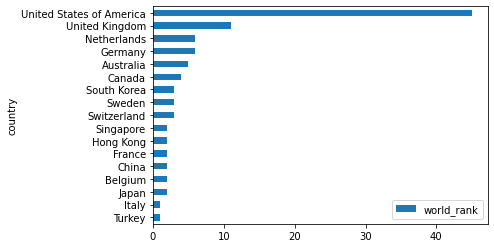

In [200]:
df = ranking_2015_top100.groupby('country').count()
df.sort_values(by='world_rank').plot(kind='barh')

In [201]:
# compare number of top ranked universities to aggregate spending by the country in the last 5 years
exp_last5 = exp.query('TIME in [2010,2011,2012,2013,2014,2015]')[['Value','Country','LOCATION']].dropna()
# sum all kinds of expenses for each country
exp_last5.Value = exp_last5[['Value','LOCATION']].groupby('LOCATION').transform('sum')
exp_last5.drop_duplicates('LOCATION', inplace=True)
exp_last5 = exp_last5.rename(columns={'Country':'country'})
# normalize the expenses
exp_last5 = pd.merge(df,exp_last5,on='country')

In [202]:
exp_last5.Value = exp_last5.Value/10**5
exp_last5 = exp_last5.set_index('country')

<AxesSubplot:xlabel='country'>

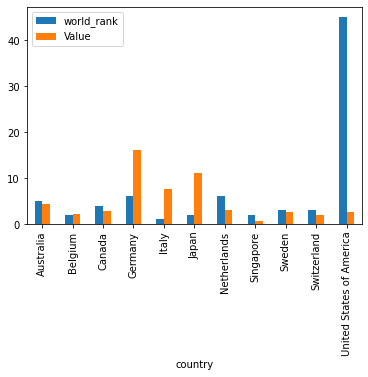

In [203]:
exp_last5.plot(kind='bar')

In [ ]:
# public and private universities
pd.read_html()